In [1]:
import os
import pandas as pd
import shutil
import time
import datetime
import json
import tqdm
import copy
import requests

In [26]:
characters = pd.read_csv('benriely.csv')

In [27]:
count = 0
for index, row in characters.iterrows():
    talents = row['Talents']
    #print(talents)
    #if 'Martial Arts' in talents:
        #print(row['Name'], talents)
        
    if 'All Martial Arts' in talents:
        print(row['Name'], talents)        

Albert ['Guns, Thrown Weapons, Sharp Weapons, Oriental Weapons, All Martial Arts, Tumbling, Military, Detective/Espionage, Ninja skills, Multi-Lingual: (English, Japanese, Russian, French), Stealth']
Anti-Cap ['All Martial Arts, Military']
Batroc the Leaper ['All Martial Arts, Acrobatics, Bilingual (English, French), Weapons Expert']
Black Light ['All Martial Arts, Shi’ar Technology, Starships, Astro-Navigation']
Cable ['Handguns, Marksman, Semi-Automatic, Weapons, All Martial Arts, Military, Detective/Espionage, Leadership']
Cable ['Handguns, Marksman, Semi-Automatic, Weapons, All Martial Arts, Military, Detective/Espionage, Leadership']
Cache ['Computers, All Martial Arts, All Scientific Skills']
Captain America ['Weapons Specialist: Shield, All Martial Arts, Artist, Leadership, Military']
Captain America ['Military, Marksmanship, Guns, Weapon Specialist: (Shield), Leadership, All Martial Arts, Acrobatics, Tumbling, Weapons Master, Thrown Weapons, Thrown Objects, Sharp Weapons, Motor

In [28]:
dfMA = characters.loc[characters['Talents'].str.contains('All Martial')]
dfMA

,Unnamed: 0,Name,Identity,Form,Alt,Alignment,Type,Size,armour_name,stated_ac,...,log,proficiency,initiative_bonus,AB_F,AB_A,AB_S,AB_E,AB_R,AB_I,AB_P
39,39,Albert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,103,Anti-Cap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,189,Batroc the Leaper,Georges Batroc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,243,Black Light,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,336,Cable,Nathan Christopher Charles Dayspring Summers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580,2580,Wolverine,Logan (James Howlett),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2582,2582,Wolverine,Logan (James Howlett),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2583,2583,Wolverine,Logan (James Howlett),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2607,2607,Xenith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


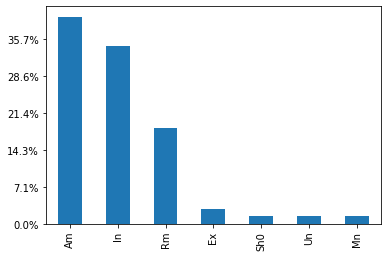

In [29]:
import matplotlib.ticker as mtick

ax = dfMA['F'].value_counts().plot(kind='bar')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(dfMA.shape[0]))


In [30]:
dfMA.loc[dfMA['F'].isin(['Sh','Un','Mn'])]

,Unnamed: 0,Name,Identity,Form,Alt,Alignment,Type,Size,armour_name,stated_ac,...,log,proficiency,initiative_bonus,AB_F,AB_A,AB_S,AB_E,AB_R,AB_I,AB_P
1788,1788,Power Princess,Zarda Shelton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2607,2607,Xenith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
dfMA.loc[dfMA['F'].isin(['Am'])]

,Unnamed: 0,Name,Identity,Form,Alt,Alignment,Type,Size,armour_name,stated_ac,...,log,proficiency,initiative_bonus,AB_F,AB_A,AB_S,AB_E,AB_R,AB_I,AB_P
351,351,Captain America,Steve Rogers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355,355,Captain America,Steve Rogers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,358,Captain America,Steve Rogers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,362,Captain Britain,"Elizabeth ""Betsy"" Braddock",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,389,The Cat,Shen Kuei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517,517,Daredevil II,Daniel Rand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,795,Gamora,Xen Whoberis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1015,1015,Captain America,Steve Rogers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075,1075,Iron Fist,Daniel Rand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1139,1139,Captain America,Isaiah Bradley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
dfMA.to_csv('Martial-Arts-All.csv')

In [33]:
dfMHMHA = dfMA.loc[~dfMA['S'].isin(['Rm','In','Am','Mn','Un'])]


In [34]:
dfMHMHA.to_csv('Mostly-Human-Martial-Arts-All.csv', index=False)

In [38]:
shang = dfMHMHA.loc[dfMHMHA['Name'] == 'Shang-Chi']
shang

,Unnamed: 0,Name,Identity,Form,Alt,Alignment,Type,Size,armour_name,stated_ac,...,log,proficiency,initiative_bonus,AB_F,AB_A,AB_S,AB_E,AB_R,AB_I,AB_P
2055,2055,Shang-Chi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
shanglist = []
dict_faserip={"Sh0":0,"Fb":2,"Pr":4,"Ty":6,"Gd":10,"Ex":20,"Rm":30,"In":40,"Am":50,"Mn":75,"Un":100,"ShX":150,"ShY":200,"ShZ":500,"Cl1000":1000,"Cl3000":3000,"Cl5000":5000,"Beyond":1000000000}
for I in dict_faserip.keys():
    newshang = copy.deepcopy(shang)
    newshang['I'] = I
    newshang['Name'] = 'Amazing Martial Artist I) ' + I
    newshang['Alignment'] = 'Amazing Martial Artist I) ' + I
    if I == "ShX":
        break
    shanglist.append(newshang)
    

In [52]:
dfAmazingMartialArtistI = pd.concat(shanglist)
dfAmazingMartialArtistI = dfAmazingMartialArtistI.reset_index(drop=True)
del dfAmazingMartialArtistI['Unnamed: 0']
dfAmazingMartialArtistI.to_csv('AmazingMartialArtistI.csv', index=False)